In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def step(state,action):
    
    done= False
    reward=-1
    next_state=state

    #Left
    if(a==0 and state%5!=0):
        next_state= state-1

    #Up
    if(a==1 and state>4):
        next_state= state-5

    #Right       
    if(a==2 and state%5!=4):
        next_state= state+1

    #Down        
    if(a==3 and state<20):
        next_state= state+5


   #Check if we reached Terminal States 
    if(next_state in Cross):
        reward= -50
        done=True

    if(next_state in Goal):
        if(next_state==24):
            reward= 20
        else:
            reward=5

        done= True
        
    return(next_state, reward, done, [state,action,next_state,reward])


# Q Learning

In [3]:
total_episodes= 500000
e=0.95
min_e= 0.1

Start=0
alpha=0.2
gamma=0.99
decay_rate=0.005

Goal= [24,12]
Cross= [9,10,21]
REWARDS=[]
Q= np.zeros((25,4))


for episode in range(total_episodes):
    state= Start
    Tr=0
    P=[e/4]*4
    greedy= np.argmax(Q[state])
    P[greedy]+= (1-e)
    a= np.random.choice([0,1,2,3], p=P)
    
    done= False
    
    while not done:
        next_state, reward, done, info= step(state, a)
        
        best_a= np.argmax(Q[next_state])
        
        Q[state][a]= Q[state][a] + (alpha*(reward + (gamma*Q[next_state][best_a]) - Q[state][a]))
        
        state= next_state
        P=[e/4]*4
        greedy= np.argmax(Q[state])
        P[greedy]+= (1-e)
        a= np.random.choice([0,1,2,3], p=P)
        
    
    REWARDS.append(Tr)
    
    e= min_e + ((0.9-min_e)*np.exp(-decay_rate*episode))
    
    print(episode, end=' \r')               

# State Action Value Table After Training

In [4]:
Q=Q.round(2)
for k in range(25):
    print('State',k,':', Q[k])

State 0 : [0.86 0.86 1.88 1.88]
State 1 : [0.86 1.88 2.91 2.91]
State 2 : [1.88 2.91 1.88 3.95]
State 3 : [2.91 1.88 0.86 2.91]
State 4 : [  1.88   0.7    0.63 -43.29]
State 5 : [  1.88   0.86   2.91 -50.  ]
State 6 : [1.88 1.88 3.95 3.95]
State 7 : [2.91 2.91 2.91 5.  ]
State 8 : [  3.95   1.88 -50.     3.95]
State 9 : [0. 0. 0. 0.]
State 10 : [0. 0. 0. 0.]
State 11 : [-50.     2.91   5.     2.91]
State 12 : [0. 0. 0. 0.]
State 13 : [5.   2.83 1.96 1.01]
State 14 : [  3.71 -10.    -0.36   0.  ]
State 15 : [ -0.2  -29.52   1.65  -0.63]
State 16 : [ -0.49   3.95   1.13 -39.51]
State 17 : [-0.36  4.86 -0.2  -0.27]
State 18 : [ 3.12 -0.   -0.49 -0.2 ]
State 19 : [-0.36  0.15  0.    0.  ]
State 20 : [ -0.4  -0.3 -10.   -0.4]
State 21 : [0. 0. 0. 0.]
State 22 : [-10.     1.13   0.     0.  ]
State 23 : [-0.2  0.   0.   0. ]
State 24 : [0. 0. 0. 0.]


# EVALUATE THE POLICY FROM Q-Learning

In [5]:
REWARD=[]
for runs in range(500):
    
    state=0
    done=False
    Tr=0
    while not done:
        
        reward=-1
        next_state=state
        a= np.argmax(Q[state])
        
        #Left
        if(a==0 and state%5!=0):
            next_state= state-1
  
        #Up
        if(a==1 and state>4):
            next_state= state-5
       
        #Right       
        if(a==2 and state%5!=4):
            next_state= state+1
      
        #Down        
        if(a==3 and state<20):
            next_state= state+5
            
       #Check if we reached Terminal States 
        if(next_state in Cross):
            reward= -50
            done=True
        
        if(next_state in Goal):
            if(next_state==24):
                reward= 20
            else:
                reward=5
                
            done= True
        
        state= next_state
        Tr+=reward
    
    REWARD.append(Tr)
   
        

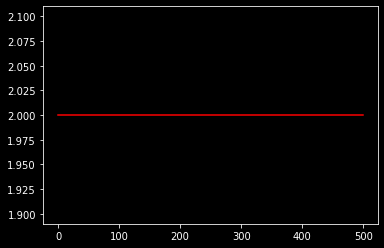

In [6]:
plt.style.use('dark_background')
plt.figure(0)
plt.plot(REWARD, color='red')

Q_Learning doesn't find the most optimal path, even when it is trained over 500,000 episodes. It creates a policy, which makes us reach Goal2 and end our episode with a reward of +2